<a href="https://colab.research.google.com/github/yohaankarian/Loan-classification-using-Machine-Learning/blob/main/Loan_approve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading the dataset
import pandas as pd
import numpy as np


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Loan_Approval_Data.csv to Loan_Approval_Data.csv


In [6]:
import io
Loandata = pd.read_csv(io.BytesIO(uploaded['Loan_Approval_Data.csv']))

In [7]:
#Removing duplicate rows if any
print('Shape before deleting values: ', Loandata.shape)
Loandata = Loandata.drop_duplicates()
print('Shape after deleting duplicate values: ', Loandata.shape)

#Printing sample data
#Start observing the Quantitative / Categorical / Qualitative variables
Loandata.head(10)

Shape before deleting values:  (614, 13)
Shape after deleting duplicate values:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


<Axes: xlabel='Loan_Status'>

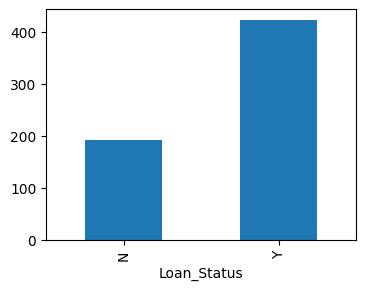

In [ ]:
# Target Variable = Loan_status
#Predictors = Gender, Married, Dependents, Education, Self_employed, Applicant income, Co applicant income, Loanamount, Loan_amount_term, Credit_history,Property_area

#Loan_status = "N" means the loan was rejected
#Loan_status = "Y" means the loan was approved

#Target variable is categorical

%matplotlib inline
#Creating a bar chart as the target variable is categorical
GroupedData = Loandata.groupby('Loan_Status').size()
GroupedData.plot(kind = 'bar', figsize = (4,3))


In [ ]:
Loandata.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
Loandata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [ ]:
# Looking at descriptive statistices of the data
Loandata.describe(include = 'all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [ ]:
#Finding unique values for each column
# To understand which column is categorical and which is continuous
# Typically if the number of unique values are < 20 then the variable is likely to be categorical otherwise continuous
Loandata.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Loan_Id , ApplicantIncome, CoapplicantIncome, LoanAmount-> high number of unique values -> Qualitative(Continuous)

 Gender, Married , Dependents, Education, Self Employed, Credit_History, Property_ Area, Loan_ Status -> less number of unique values -> Categorical



In [ ]:
#Removing useless data from the data
#Loan_ID is not useful in the predictive analysis because these variables are not qualitative
UselessColumns = ['Loan_ID']
Loandata = Loandata.drop(UselessColumns,axis=1)
Loandata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


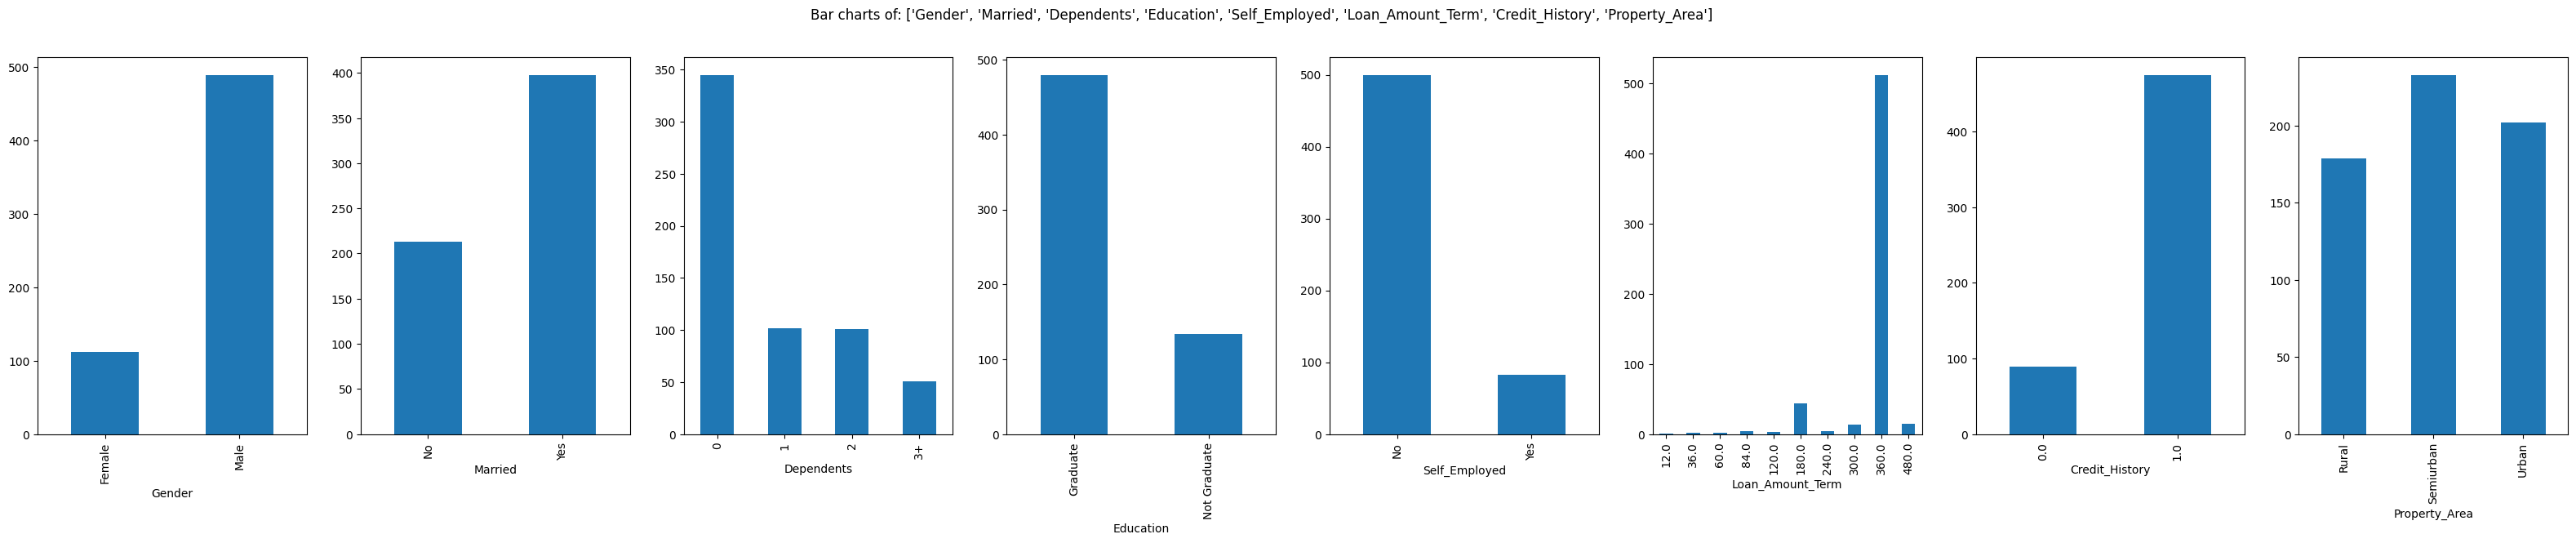

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function
PlotBarCharts(inpData=Loandata, colsToPlot=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>, <Axes: >]], dtype=object)

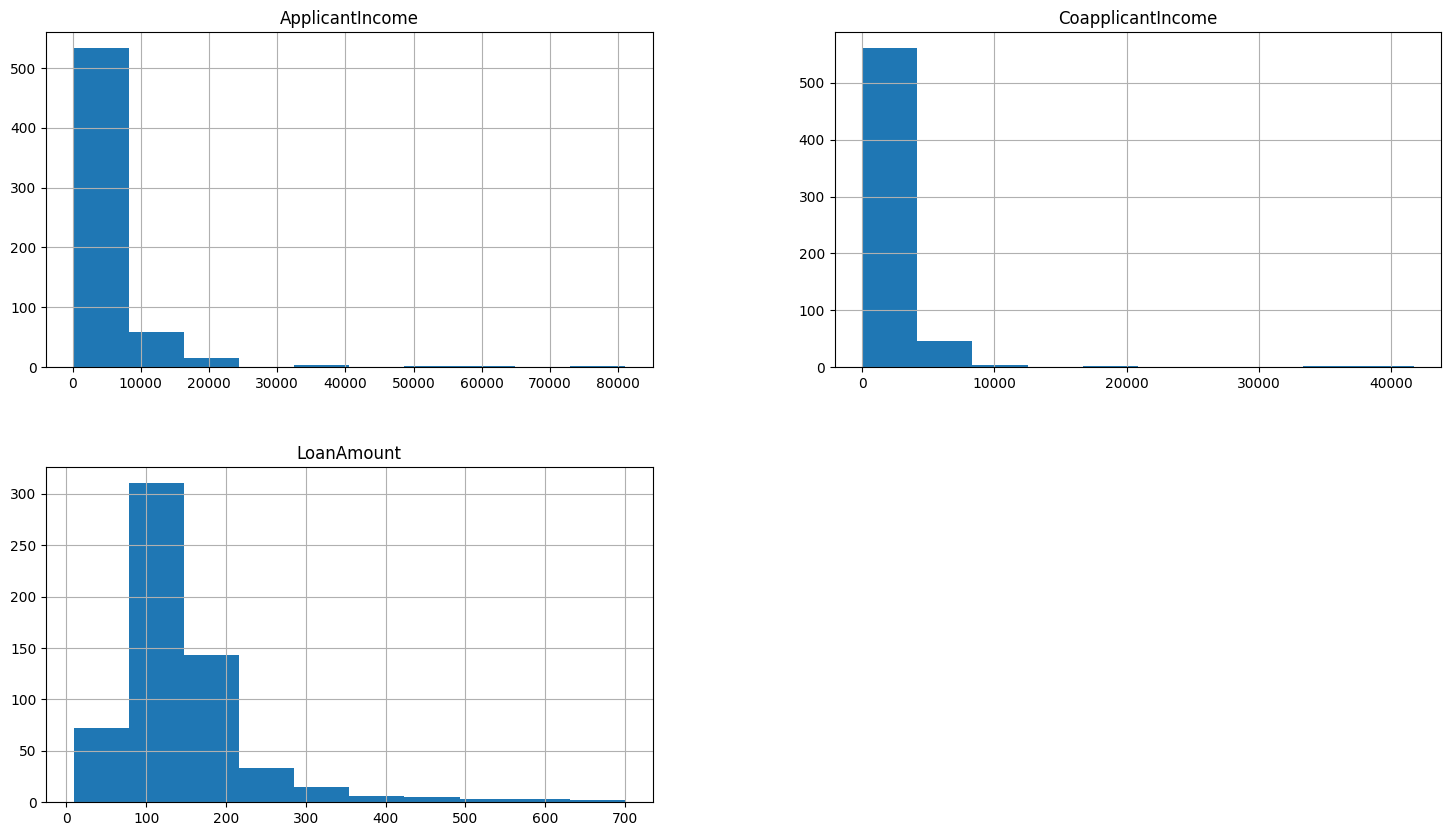

In [ ]:
# Plotting histogram of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
Loandata.hist(['ApplicantIncome','CoapplicantIncome','LoanAmount'],figsize=(18,10))


In [ ]:
#Outlier treatment - outliers are extreme values in the data which are far away from the values.

In [ ]:
# Finding nearest values to 30000 mark for applicant income
Loandata['ApplicantIncome'][Loandata['ApplicantIncome']>20000].sort_values()

130    20166
308    20233
284    20667
506    20833
126    23803
183    33846
443    37719
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, dtype: int64

In [ ]:
Loandata['ApplicantIncome'][Loandata['ApplicantIncome']>30000] = 23803

In [ ]:
# Finding nearest values to 15000 mark
Loandata['CoapplicantIncome'][Loandata['CoapplicantIncome']>10000].sort_values()

9      10968.0
177    11300.0
402    20000.0
417    20000.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64

In [ ]:
# Replacing outliers with nearest possibe value
Loandata['CoapplicantIncome'][Loandata['CoapplicantIncome']>15000] = 11300

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>]], dtype=object)

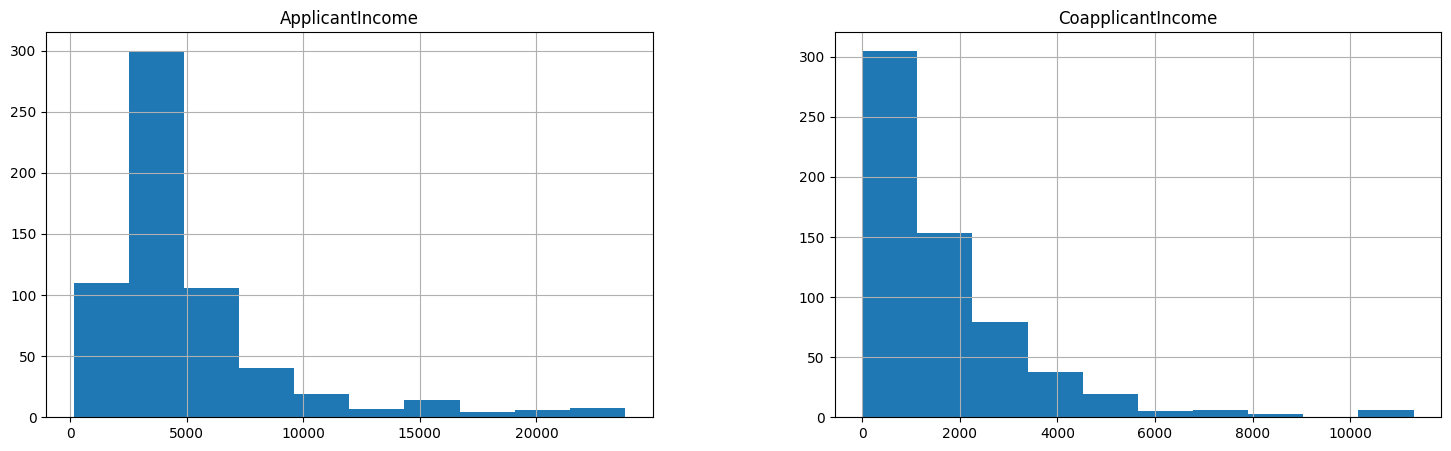

In [ ]:
Loandata.hist(['ApplicantIncome', 'CoapplicantIncome'], figsize=(18,5))

In [ ]:
#Missing value treatment - if a column has more than 30% missing values we will reject that column because too much information is missing

There are below options for treating missing values in data.



*  Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables

*  Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values


* Interpolate the values based on business logic












In [ ]:
# Finding how many missing values are there for each column
Loandata.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Replacing the missing values
# Using MODE for categorical columns
Loandata['Gender'].fillna(Loandata['Gender'].mode()[0], inplace=True)
Loandata['Married'].fillna(Loandata['Married'].mode()[0], inplace=True)
Loandata['Dependents'].fillna(Loandata['Dependents'].mode()[0], inplace=True)
Loandata['Self_Employed'].fillna(Loandata['Self_Employed'].mode()[0], inplace=True)
# Using Mode value for Loan_Amount_Term since it is a categorical variable
Loandata['Loan_Amount_Term'].fillna(Loandata['Loan_Amount_Term'].mode()[0], inplace=True)
Loandata['Credit_History'].fillna(Loandata['Credit_History'].mode()[0], inplace=True)

# Using Median value for continuous columns
Loandata['LoanAmount'].fillna(Loandata['LoanAmount'].median(), inplace=True)

In [9]:
# Checking missing values again after the treatment
Loandata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

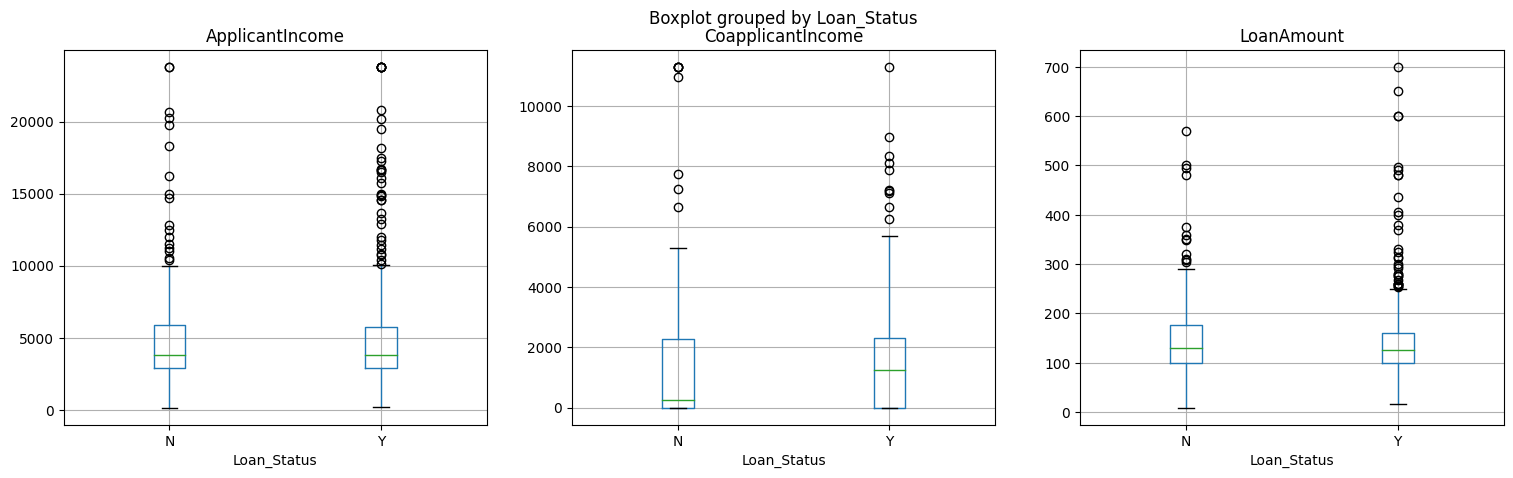

In [ ]:
# Box plots for Categorical Target Variable "Loan_Status" and continuous predictors
ContinuousColsList=['ApplicantIncome','CoapplicantIncome', 'LoanAmount']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Loan_Status"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    Loandata.boxplot(column=PredictorCol, by='Loan_Status', figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
FunctionAnova(inpData=Loandata, TargetVariable='Loan_Status', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

ApplicantIncome is NOT correlated with Loan_Status | P-Value: 0.9529534007092838
CoapplicantIncome is NOT correlated with Loan_Status | P-Value: 0.6651120750168427
LoanAmount is NOT correlated with Loan_Status | P-Value: nan


[]

In [ ]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=Loandata['Gender'], columns=Loandata['Loan_Status'])
CrossTabResult

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


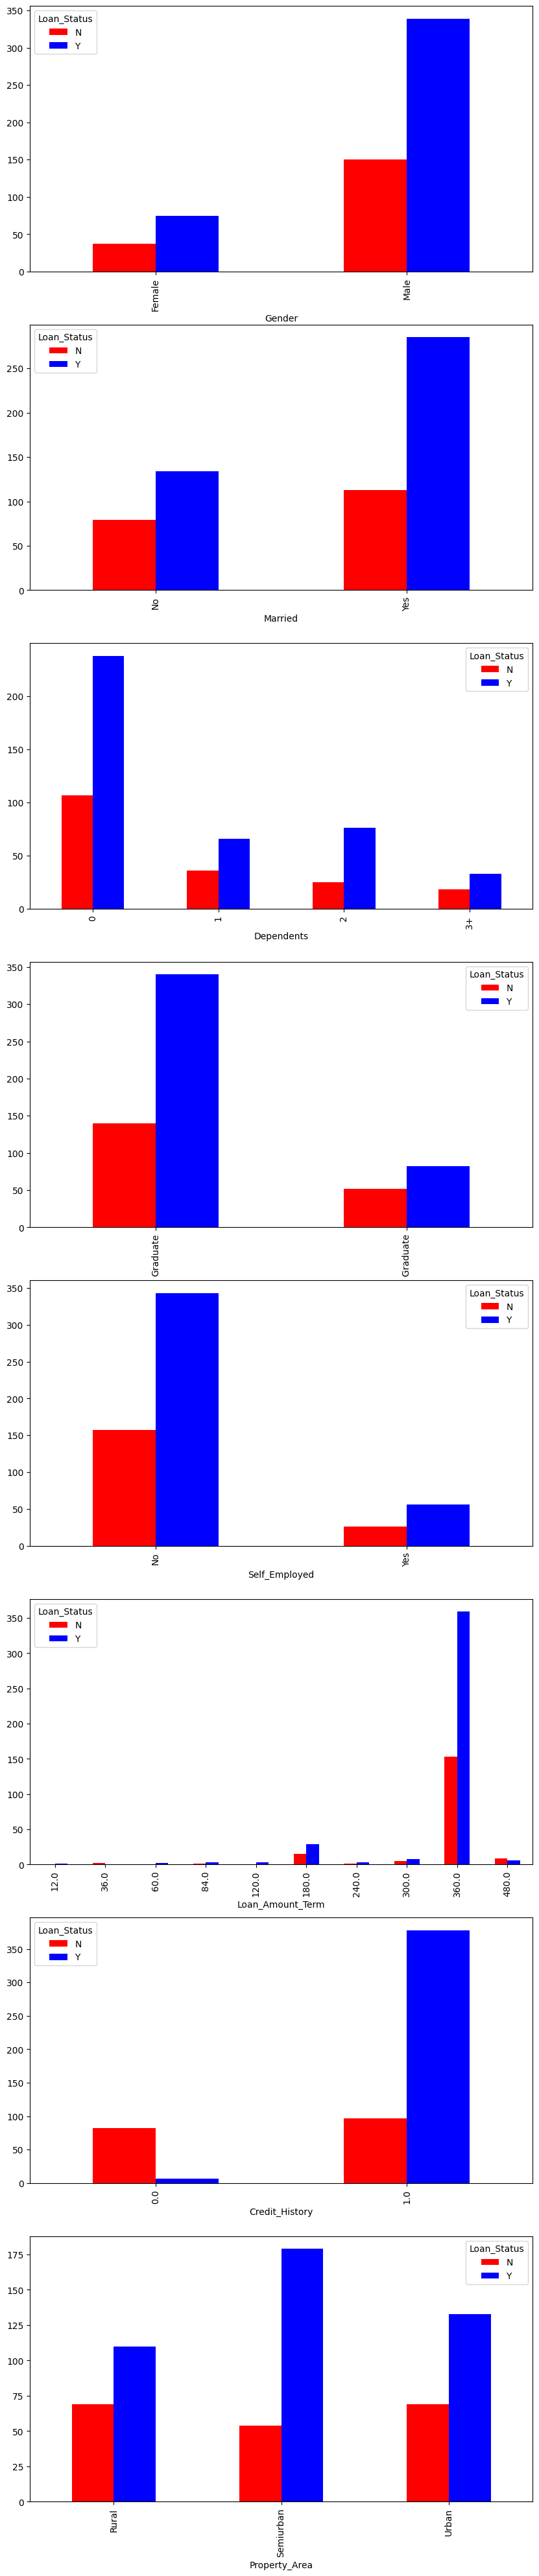

In [ ]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=Loandata[CategoricalCol], columns=Loandata['Loan_Status'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

In [ ]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [ ]:
CategoricalVariables=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Calling the function
FunctionChisq(inpData=Loandata,
              TargetVariable='Loan_Status',
              CategoricalVariablesList= CategoricalVariables)

Gender is NOT correlated with Loan_Status | P-Value: 0.7086529816451106
Married is correlated with Loan_Status | P-Value: 0.03439381301579988
Dependents is NOT correlated with Loan_Status | P-Value: 0.3678506740863211
Education is correlated with Loan_Status | P-Value: 0.04309962129357355
Self_Employed is NOT correlated with Loan_Status | P-Value: 1.0
Loan_Amount_Term is NOT correlated with Loan_Status | P-Value: 0.12185762421276597
Credit_History is correlated with Loan_Status | P-Value: 7.184759548750746e-40
Property_Area is correlated with Loan_Status | P-Value: 0.0021360187811644915


['Married', 'Education', 'Credit_History', 'Property_Area']

In [11]:
SelectedColumns=['Married', 'Education', 'Credit_History', 'Property_Area']

# Selecting final columns
DataForML=Loandata[SelectedColumns]
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,No,Graduate,1.0,Urban
1,Yes,Graduate,1.0,Rural
2,Yes,Graduate,1.0,Urban
3,Yes,Not Graduate,1.0,Urban
4,No,Graduate,1.0,Urban


In [ ]:
# Treating the binary nominal variables first
DataForML['Married'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,0.0,1,1.0,Urban
1,1.0,1,1.0,Rural
2,1.0,1,1.0,Urban
3,1.0,0,1.0,Urban
4,0.0,1,1.0,Urban


In [31]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [21]:
# Treating the binary nominal variables first
DataForML['Married'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,0,1,1.0,Urban
1,1,1,1.0,Rural
2,1,1,1.0,Urban
3,1,0,1.0,Urban
4,0,1,1.0,Urban


In [22]:
#Converting the nominal variable to numeric using get_dummies()
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Loan_Status']=Loandata['Loan_Status']

# Printing sample rows
DataForML_Numeric.head()

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,1,1.0,0,0,1,Y
1,1,1,1.0,1,0,0,N
2,1,1,1.0,0,0,1,Y
3,1,0,1.0,0,0,1,Y
4,0,1,1.0,0,0,1,Y


In [23]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [24]:
# Separate Target Variable and Predictor Variables
TargetVariable='Loan_Status'
Predictors=['Married', 'Education', 'Credit_History', 'Property_Area_Rural','Property_Area_Semiurban', 'Property_Area_Urban']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [25]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 6)
(429,)
(185, 6)
(185,)


In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.97      0.43      0.60        74
           Y       0.72      0.99      0.84       111

    accuracy                           0.77       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.77      0.74       185

[[ 32  42]
 [  1 110]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')
# Training the model on 100% Data available
LogisticRegressionModel=clf.fit(X,y)

In [30]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('LogisticRegressionModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(LogisticRegressionModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


In [32]:
def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs=InputLoanDetails.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputLoanDetails=InputLoanDetails.append(DataForML)

    # Treating the binary nominal variables first
    InputLoanDetails['Married'].replace({'Yes':1, 'No':0}, inplace=True)
    InputLoanDetails['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)

    # Generating dummy variables for rest of the nominal variables
    InputLoanDetails=pd.get_dummies(InputLoanDetails)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']

    # Generating the input values to the model
    X=InputLoanDetails[Predictors].values[0:Num_Inputs]



    # Loading the Function from pickle file
    import pickle
    with open('LogisticRegressionModel.pkl', 'rb') as fileReadStream:
        LogRegression_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=LogRegression_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [36]:
# Calling the function for some loan applications
NewLoanApplications=pd.DataFrame(
data=[['No','Graduate',1,'Urban'],
     ['No','Graduate',0,'Urban'],['Yes','Not Graduate',1,'Rural'],['No','Graduate',0,'Rural']],
columns=['Married','Education','Credit_History','Property_Area'])

print(NewLoanApplications)

# Calling the Function for prediction
PredictLoanStatus(InputLoanDetails= NewLoanApplications)

  Married     Education  Credit_History Property_Area
0      No      Graduate               1         Urban
1      No      Graduate               0         Urban
2     Yes  Not Graduate               1         Rural
3      No      Graduate               0         Rural


,Predicted Status
0,Y
1,N
2,Y
3,N
